<a href="https://colab.research.google.com/github/priyajain220891/Data_analyst_projects/blob/main/JAMBOREE_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


**Feature Profiling:**

1.Serial No. - Unique row ID

2.GRE Score - (out of 340)

3.TOEFL Score - (out of 120)

4.University Rating - (out of 5)

5.SOP - Strength of Statement of Purpose (out of 5)

6.LOR - Strength of Letter of Recommendation (out of 5)

7.CGPA - Undergraduate GPA (out of 10)

8.Research - Research Experience (either 0 or 1)

9.Chance of Admit - (0 to 1)







# **Problem statement**
Jamboree aims to analyze factors influencing graduate admissions to IVY league colleges, develop predictive models using linear regression, and provide actionable insights for improving admission chances based on student profiles.

# **Import all the files**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import  r2_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# **Read the data set**

In [4]:
df= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73



# **Analyzing basic metrics about dataset**

In [5]:
#shape(rows,column)
print("rows:",df.shape[0],"column:",df.shape[1])

rows: 500 column: 9


In [6]:
#total number of data points
df.size


4500

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
#statistical summary
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
#Chaning the column name
df.rename(columns={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','LOR ':'LOR','Chance of Admit ':'Chance_of_Admit'}, inplace=True)

AS we observe that "University_Rating", "SOP", "LOR" and "Research" are behaving like categorical values, let's convert them to categorical features.

In [11]:
# CHanging the data type of feature
df[['University_Rating','SOP','LOR','Research']] = df[['University_Rating','SOP','LOR','Research']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Serial No.         500 non-null    int64   
 1   GRE_Score          500 non-null    int64   
 2   TOEFL_Score        500 non-null    int64   
 3   University_Rating  500 non-null    category
 4   SOP                500 non-null    category
 5   LOR                500 non-null    category
 6   CGPA               500 non-null    float64 
 7   Research           500 non-null    category
 8   Chance_of_Admit    500 non-null    float64 
dtypes: category(4), float64(2), int64(3)
memory usage: 22.7 KB


In [12]:
#finding unique values in columns
df.nunique()

Serial No.           500
GRE_Score             49
TOEFL_Score           29
University_Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance_of_Admit       61
dtype: int64

In [13]:
#check for duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [14]:
#find Unique values in all features
for i in df.columns[1:]:
  print(f'\nThe unique values in "{i}" are : \n{df[i].unique()}', end='\n'+'-'*100+'\n')


The unique values in "GRE_Score" are : 
[337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]
----------------------------------------------------------------------------------------------------

The unique values in "TOEFL_Score" are : 
[118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]
----------------------------------------------------------------------------------------------------

The unique values in "University_Rating" are : 
[4, 3, 2, 5, 1]
Categories (5, int64): [1, 2, 3, 4, 5]
----------------------------------------------------------------------------------------------------

The unique values in "SOP" are : 
[4.5, 4.0, 3.0, 3.5, 2.0, 5.0, 1.5, 1.0, 2.5]
Categories (9, float64): [1.0, 1.5, 2.0, 2.5, ..., 3.5, 4.0, 4.5, 5.0]
--------------------------------------

In [15]:
df.head(5)

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# **Missing Value & Outlier Detection:**

In [16]:
#finding the null values
df.isnull().sum()

Serial No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

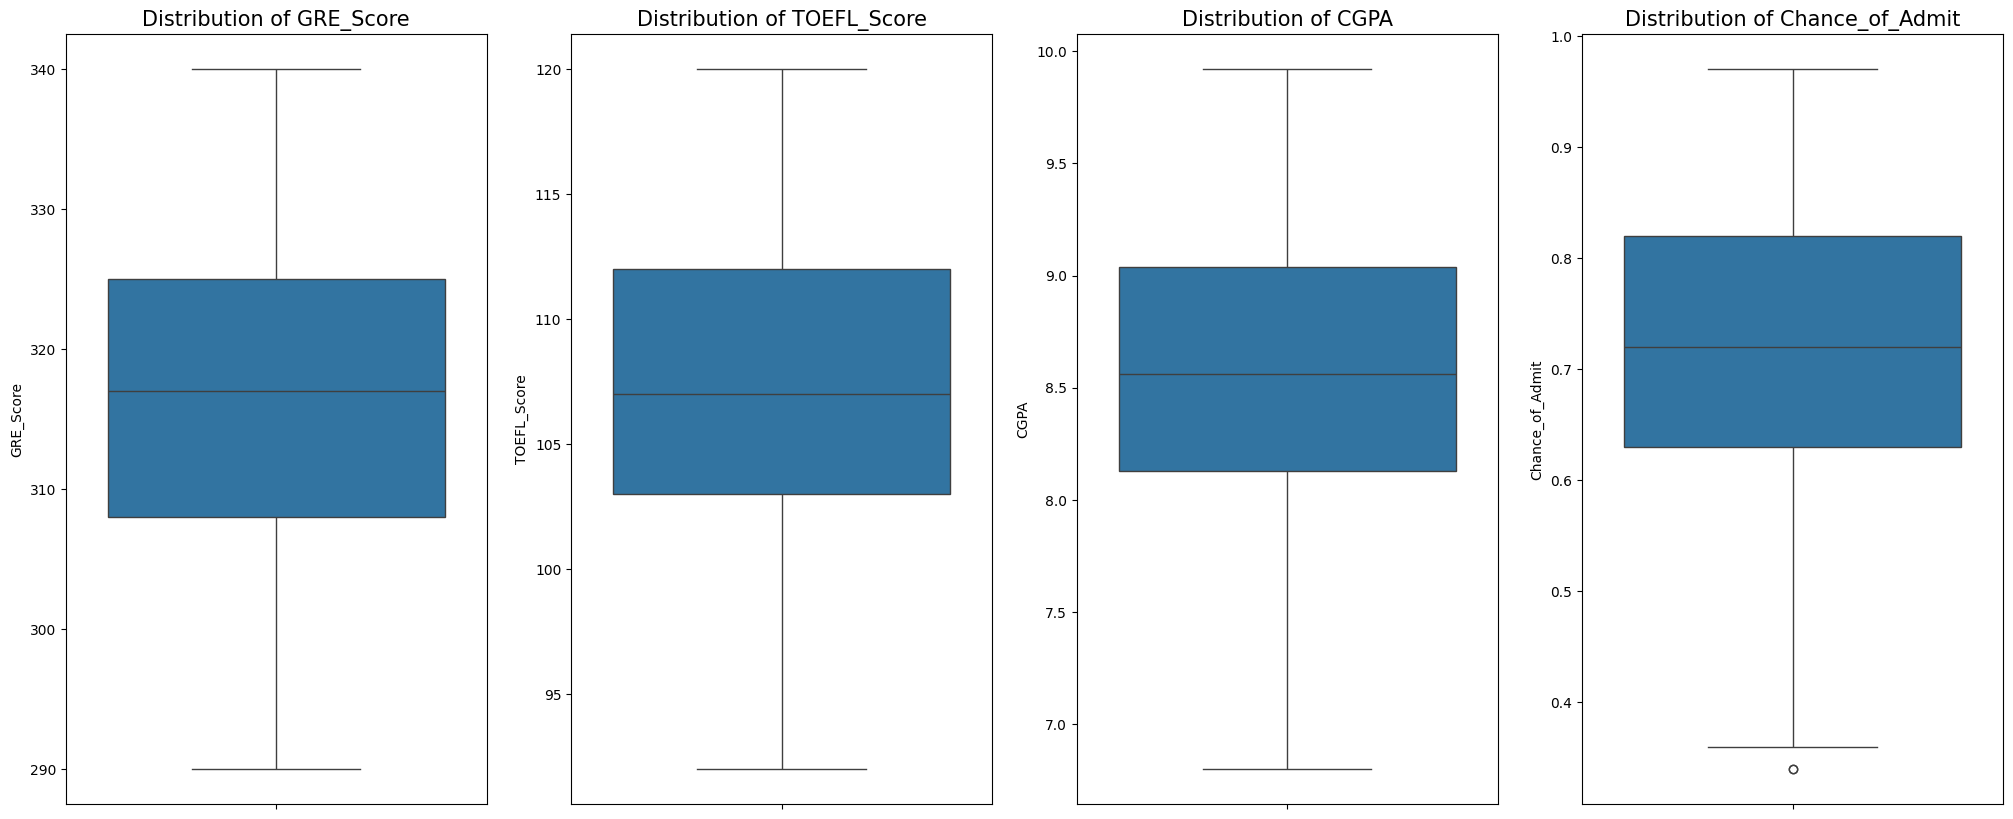

In [17]:
#finding the outliers in numerical features
num_cols = df.select_dtypes(include=['int','float']).columns[1:]
i=1
plt.figure(figsize=(25,10))
for col in num_cols:
  plt.subplot(1,4,i)
  sns.boxplot(y=col, data=df)
  plt.title(f'Distribution of {col}', fontsize=15)
  i += 1
plt.show()


**Insights:** There are no null values and outliers in data.

# **Univariate Analysis:**

<ipython-input-18-1bd9bf21899a>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)
<ipython-input-18-1bd9bf21899a>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,2)
<ipython-input-18-1bd9bf21899a>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,3)


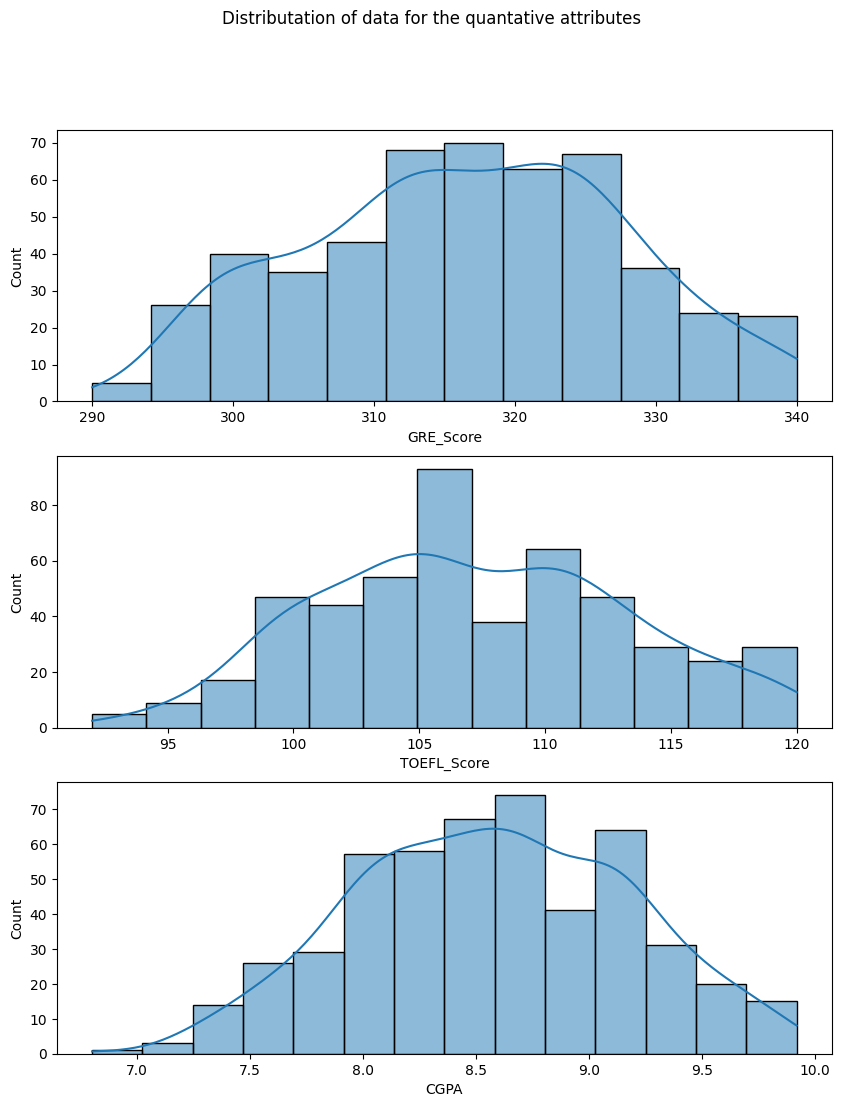

In [18]:

#Distributation of data for the quantative attributes
fig,ax=plt.subplots(3,2,figsize=(10,12))
fig.suptitle("Distributation of data for the quantative attributes")

plt.subplot(3,1,1)
sns.histplot(data=df,x="GRE_Score",kde=True)

plt.subplot(3,1,2)
sns.histplot(data=df,x="TOEFL_Score",kde=True)

plt.subplot(3,1,3)
sns.histplot(data=df,x="CGPA",kde=True)
plt.show()





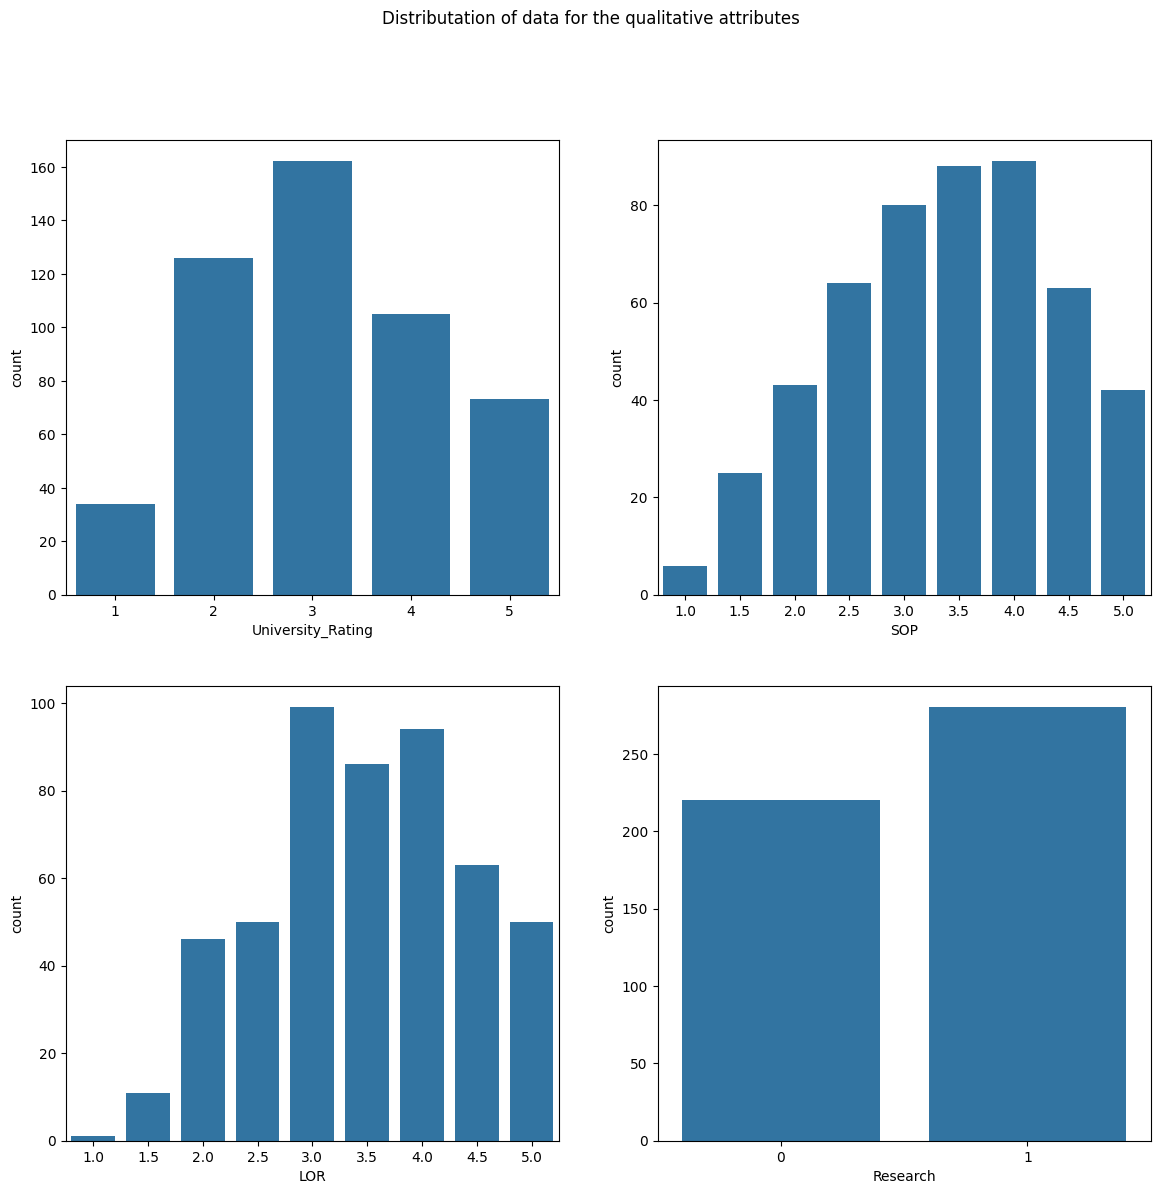

In [19]:
#Distributation of data for the qualitative attribute
fig,ax=plt.subplots(2,2,figsize=(14,13))
fig.suptitle("Distributation of data for the qualitative attributes")

plt.subplot(2,2,1)
sns.countplot(data=df,x="University_Rating",)

plt.subplot(2,2,2)
sns.countplot(data=df,x="SOP")

plt.subplot(2,2,3)
sns.countplot(data=df,x="LOR")

plt.subplot(2,2,4)
sns.countplot(data=df,x="Research")
plt.show()


<Axes: xlabel='Chance_of_Admit'>

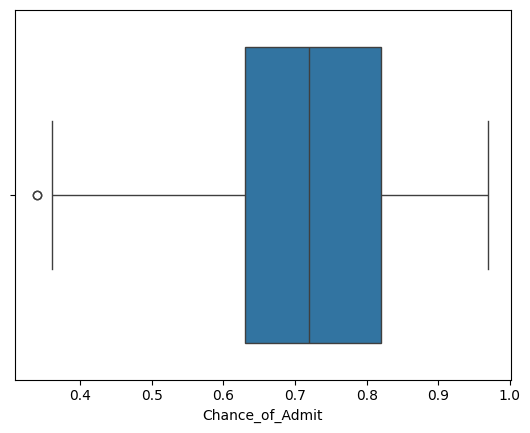

In [20]:
sns.boxplot(x='Chance_of_Admit', data=df)


**Insights:**  A majority of the aspirants exhibit the following profile: GRE Scores ranging from 312 to 327, TOEFL Scores between 105 and 111, a University Rating of 3, Letter of Recommendation (LOR) ratings averaging at 4, Undergraduate CGPA falling within the range of 8.1 to 9.1, and a corresponding Chance of Admission around 72%.








#**Bivariate and Multivariate Analysis**


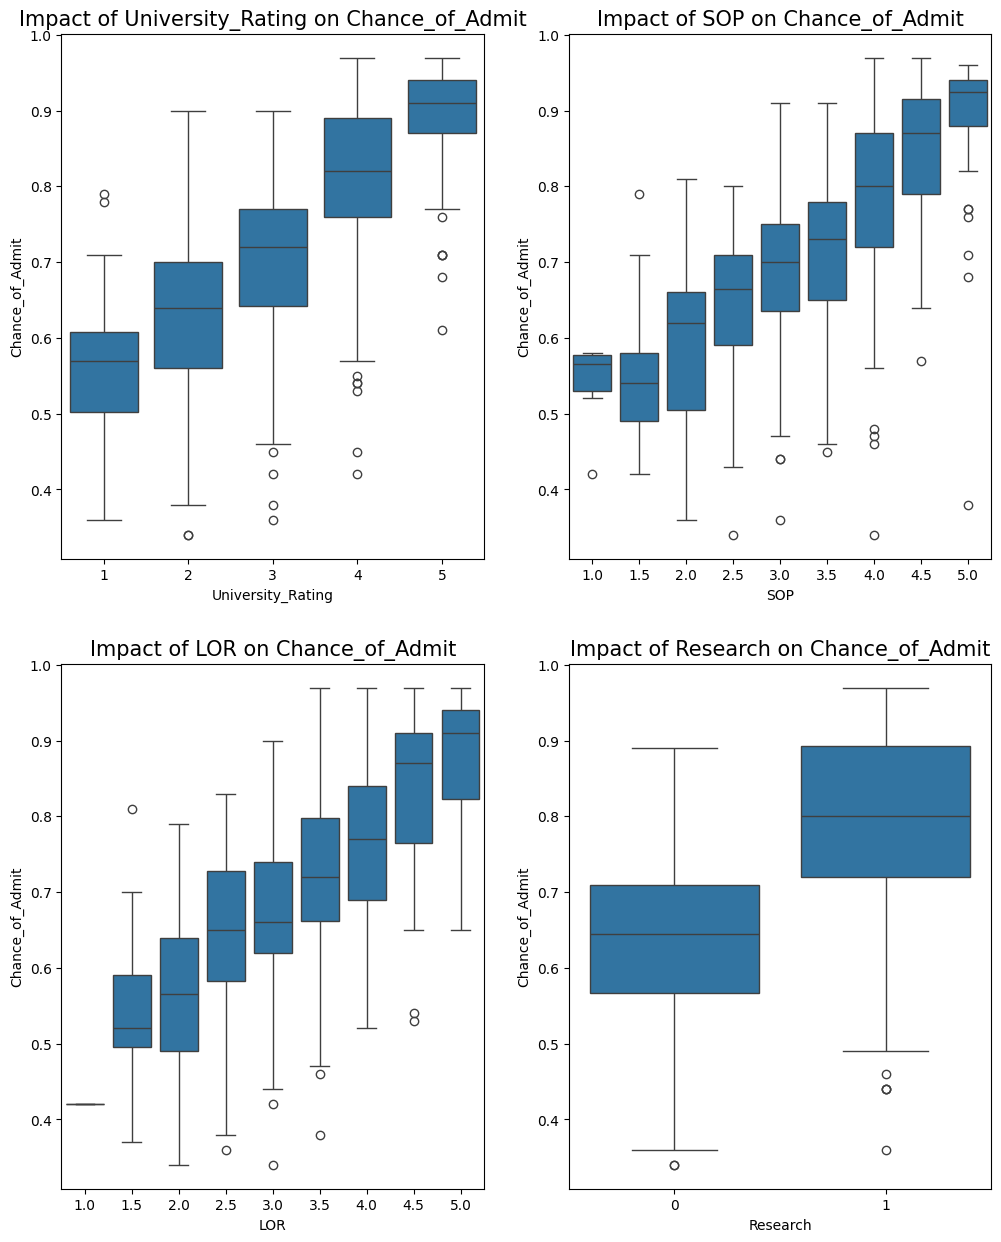

In [21]:
#Finding the impact of feature on "Chance_of_Admit"
cat_cols = df.select_dtypes(include=['category']).columns
plt.figure(figsize=(12,15))
i=1
for col in cat_cols:
  plt.subplot(2,2,i)
  sns.boxplot(x=col, y='Chance_of_Admit', data = df)
  plt.title(f"Impact of {col} on Chance_of_Admit", fontsize=15)
  plt.xlabel(col)
  plt.ylabel('Chance_of_Admit')
  i+=1

plt.show()

**Insights:**All features have an impact on the likelihood of admission.







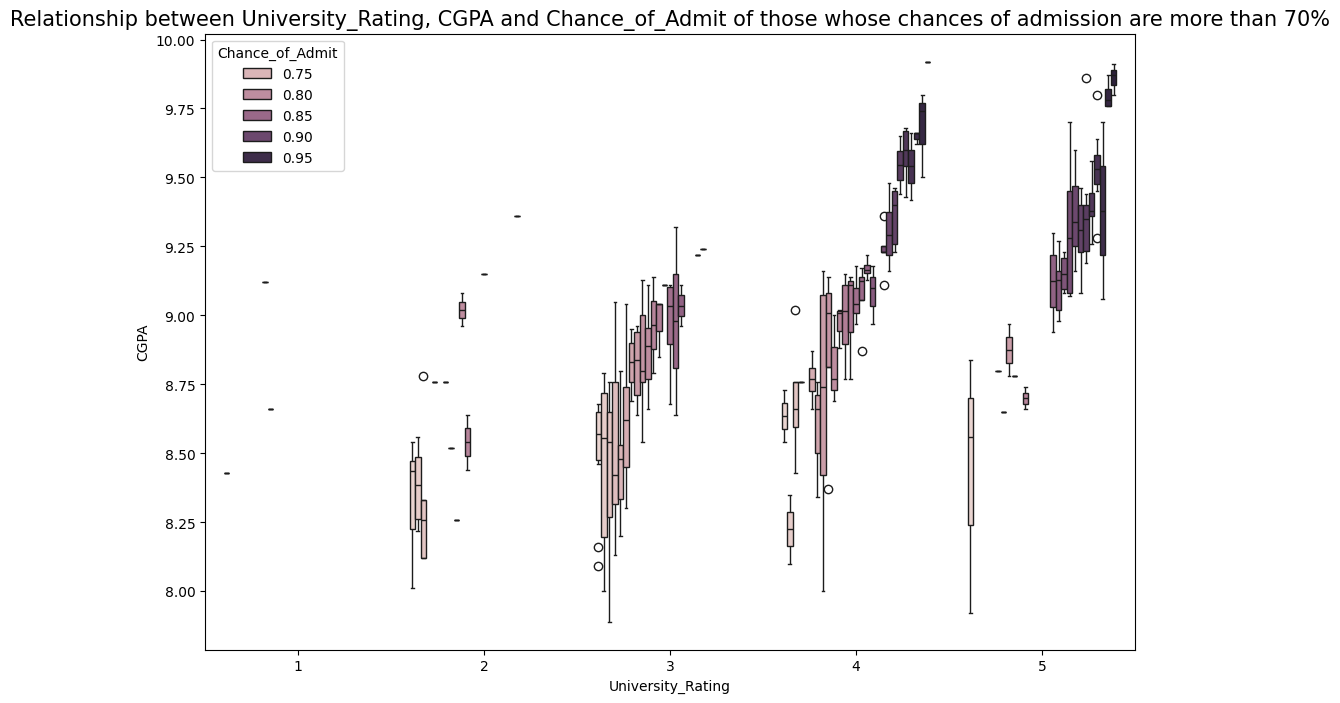

In [22]:
#Finding  the impact of  features on "chance of Admit" by using a boxplot
plt.figure(figsize=(12,8))
sns.boxplot(x='University_Rating', y='CGPA', hue='Chance_of_Admit', data=df[df['Chance_of_Admit']>0.7])
plt.title('Relationship between University_Rating, CGPA and Chance_of_Admit of those whose chances of admission are more than 70%', fontsize=15)
plt.show()

**Insights:** When we focus on candidates with over a 70% chance of admission, we notice that having a better university rating and a higher GPA increases their chances of getting accepted. For instance, someone with a university rating of 4 and a GPA of 9 has an 85% chance of getting in. Similarly, a candidate with a university rating of 5 and a GPA of 9.25 has an impressive 95% chance of admission.

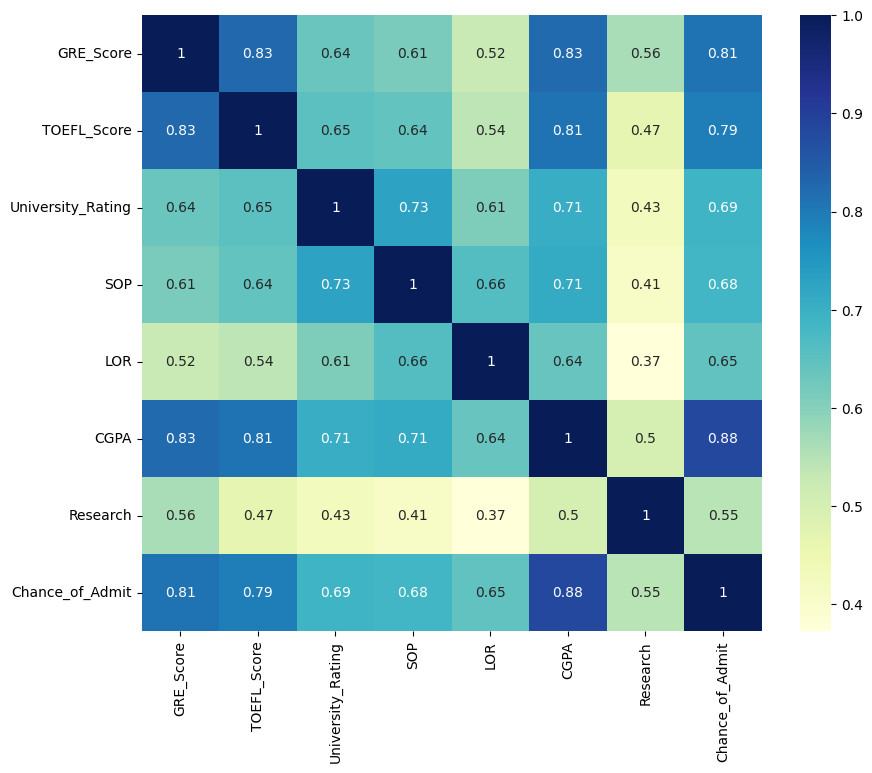

In [23]:
#Finding the correlation between all features
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.iloc[:,1:].corr(numeric_only=False), cmap="YlGnBu", annot=True)

**Insights:** Based on the visual analyses conducted, it is evident that the features strongly correlated with the likelihood of admission (Chance_of_Admit) are CGPA, GRE Score, and TOEFL Score. Additionally, it is noteworthy that GRE Score and TOEFL Score exhibit a strong correlation with each other, as depicted in the heatmap.







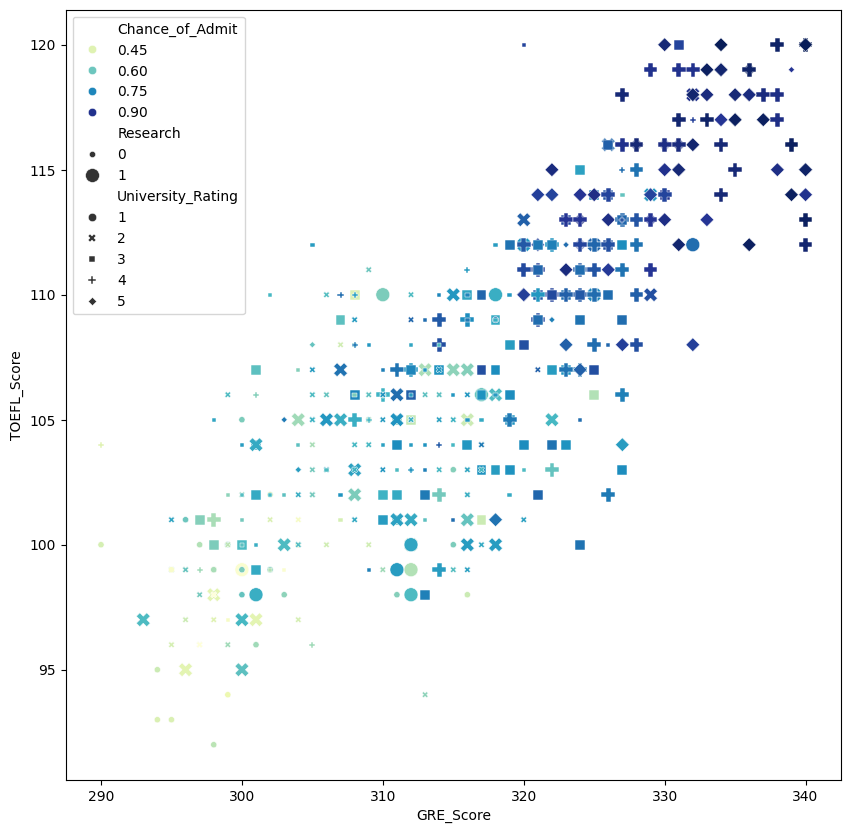

In [24]:
#plot a scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(x='GRE_Score', y='TOEFL_Score', data=df, hue='Chance_of_Admit', size='Research', sizes=[20,100], size_order=[0,1], style='University_Rating', palette="YlGnBu")
plt.show()

**Insights:**Having better GRE Scores, TOEFL Scores, a higher University Rating, along with research experience significantly enhances the chances of admission. Specifically, a candidate with a GRE Score of 320, a TOEFL Score of 110, and research experience has an 80% chance of admission. Furthermore, an applicant with a GRE Score of 330, a TOEFL Score of 110, and research experience is poised to secure a 90% chance of admission.

It's also notable that most aspirants with a Chance_of_Admit of 0.9 are affiliated with universities rated 4 or 5.








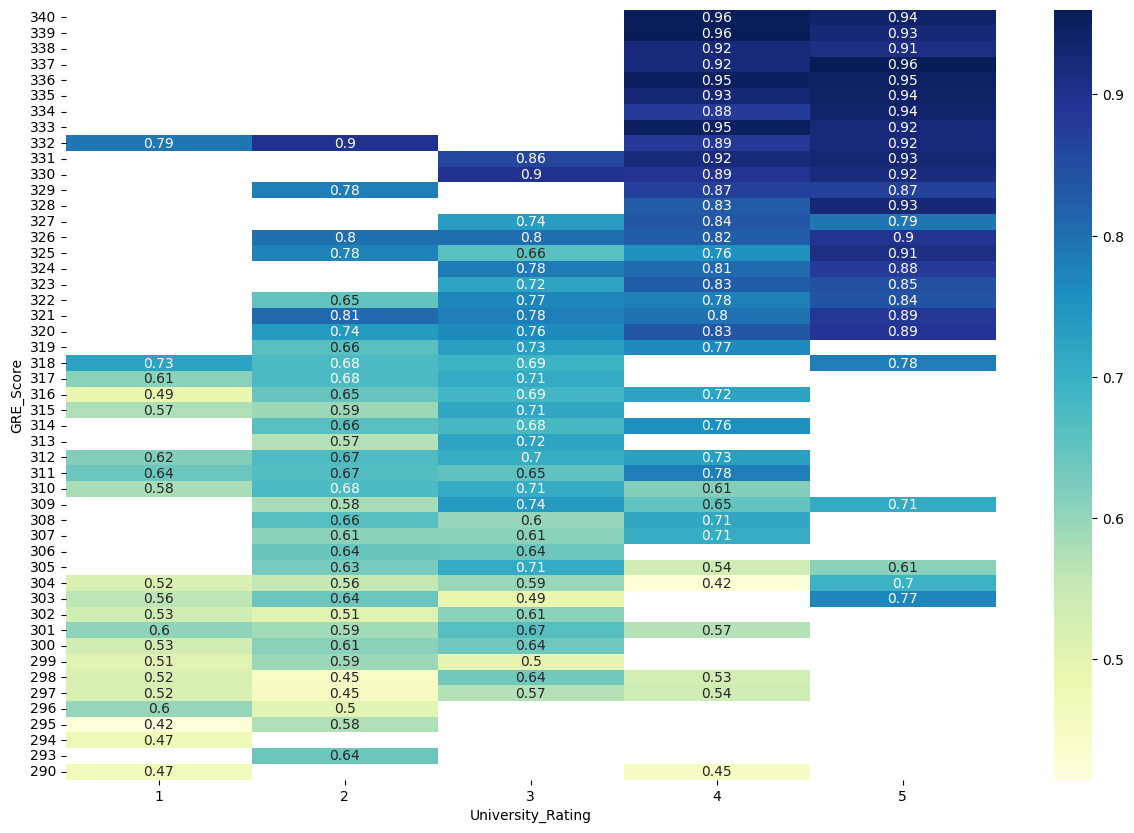

In [25]:
#create a piviot table for finding the impact of freatures on Chance_of_Admit
pivot_df=df.pivot_table(values='Chance_of_Admit', columns='University_Rating', index='GRE_Score')
pivot_df.sort_values(by='GRE_Score', ascending=False, inplace=True)
plt.figure(figsize=(15,10))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True)
plt.show()

**Insight:**
An aspirant having University_Rating of 4 and a GRE_Score of 330 will have a 90% chances of getting admission.

Also, chances are the same in case an aspirant having University_Rating of 5 and a GRE_Score of 324.

#**Train-Test Split & Standardisation**

In [26]:
#Removing the column "Chanve_of-Admit" from DataFrame
print(f'Numerical columns are : {num_cols}')
num_cols = list(num_cols)
num_cols.remove('Chance_of_Admit')
print(f'Numerical columns after removing the target feature, i.e, Chance_of_Admit are : {num_cols}')

Numerical columns are : Index(['GRE_Score', 'TOEFL_Score', 'CGPA', 'Chance_of_Admit'], dtype='object')
Numerical columns after removing the target feature, i.e, Chance_of_Admit are : ['GRE_Score', 'TOEFL_Score', 'CGPA']


In [27]:
cat_cols = list(cat_cols)
print(f'Categorical columns are : {cat_cols}')
cat_cols = list(cat_cols)

Categorical columns are : ['University_Rating', 'SOP', 'LOR', 'Research']


Now, we'll create a dataframe where we'll drop the unique row Identifier, i.e, Serial No. This step is important as we don't want our model to build some understanding based on row numbers.

In [28]:
#Creating a new DataFrame
x = df[num_cols+cat_cols]
x.head(3)

,GRE_Score,TOEFL_Score,CGPA,University_Rating,SOP,LOR,Research
0,337,118,9.65,4,4.5,4.5,1
1,324,107,8.87,4,4.0,4.5,1
2,316,104,8.00,3,3.0,3.5,1


In [29]:
y = df[['Chance_of_Admit']]
y.head(3)

,Chance_of_Admit
0,0.92
1,0.76
2,0.72


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print('-'*35)
print('Details of Train DataFrame')
print('-'*35)
print(f'Number of rows in x_train = {x_train.shape[0]}')
print(f'Number of rows in y_train = {y_train.shape[0]}')
print()
print('-'*35)
print('Details of Test DataFrame')
print('-'*35)
print(f'Number of rows in x_test = {x_test.shape[0]}')
print(f'Number of rows in y_test = {y_test.shape[0]}')

-----------------------------------
Details of Train DataFrame
-----------------------------------
Number of rows in x_train = 350
Number of rows in y_train = 350

-----------------------------------
Details of Test DataFrame
-----------------------------------
Number of rows in x_test = 150
Number of rows in y_test = 150


In [31]:
scaler_x = MinMaxScaler()
scaler_x.fit(x)

MinMaxScaler()

In [32]:
x_train[x_train.columns] = scaler_x.transform(x_train[x_train.columns])
x_train.head(3)

,GRE_Score,TOEFL_Score,CGPA,University_Rating,SOP,LOR,Research
5,0.80,0.821429,0.814103,1.0,0.875,0.500,1.0
116,0.18,0.357143,0.583333,0.5,0.750,0.625,0.0
45,0.64,0.642857,0.737179,1.0,1.000,0.750,1.0


In [33]:
x_test[x_test.columns] = scaler_x.transform(x_test[x_test.columns])
x_test.head(3)

,GRE_Score,TOEFL_Score,CGPA,University_Rating,SOP,LOR,Research
361,0.88,0.857143,0.878205,0.75,0.750,0.625,1.0
73,0.48,0.571429,0.717949,0.75,0.875,0.750,1.0
374,0.50,0.464286,0.272436,0.25,0.250,0.375,0.0


In [34]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_predicted_train = lr.predict(x_train)
y_predicted_test = lr.predict(x_test)
def model_evaluation(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])

  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
  RMSE = np.round(mean_squared_error(y_true=y_actual, y_pred=y_forecast, squared=False),2)
  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)

  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
  return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

In [35]:
model_evaluation(y_actual = y_train.values, y_forecast = y_predicted_train, model = lr)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


In [36]:
model_evaluation(y_actual = y_test.values, y_forecast = y_predicted_test, model = lr)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.83
Adjusted R2: 0.82


In [37]:
for feature, weight in zip(x_train.columns, lr.coef_[0]):
  print(f"Weight of {feature}: {np.round(weight,2)}")

print(f'Bias term of the model : {np.round(lr.intercept_[0],2)}')

Weight of GRE_Score: 0.11
Weight of TOEFL_Score: 0.1
Weight of CGPA: 0.36
Weight of University_Rating: 0.01
Weight of SOP: 0.01
Weight of LOR: 0.06
Weight of Research: 0.02
Bias term of the model : 0.35


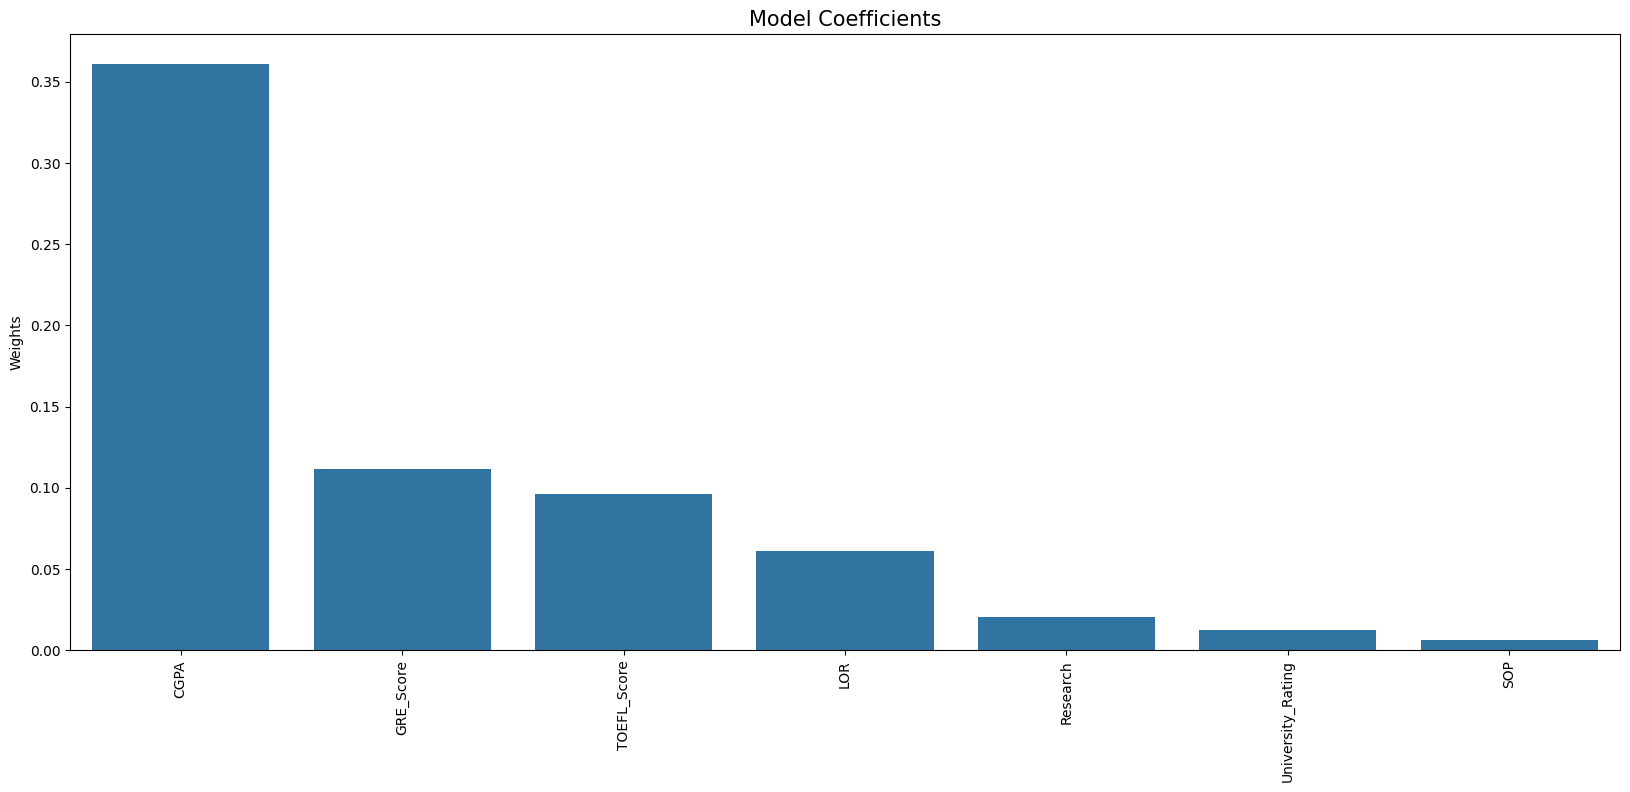

In [38]:
model_weights=list(zip(x_train.columns, lr.coef_[0]))
model_weights.sort(key=lambda x:x[1], reverse=True)

features = [i[0] for i in model_weights]
weights = [i[1] for i in model_weights]

plt.figure(figsize=(20,8))
sns.barplot(x=features, y=weights)
plt.title('Model Coefficients', fontsize=15)
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.show()

 **Insights:**  Since the training and test data exhibit similar loss scores, we can infer that our model does not suffer from overfitting.

* With a Mean Absolute Error of 0.04, we observe that, on average, the absolute disparity between the actual and predicted Chance_of_Admit values is 4%.

* A Root Mean Square Error of 0.06 indicates that, on average, the square root of the squared differences between the actual and predicted values is 6%.

* An R-squared (R2) Score of 0.82 implies that our model captures approximately 82% of the variance present in the data.

* Adjusted R-squared (Adjusted R2) serves as an extension of R2, illustrating how the accuracy of predictions changes with the inclusion of additional features.

# **Testing Assumptions of Linear Regression Model**

# **Multicolinearity Check**

**VIF (Variance Inflation Factor):** VIF is a measure used to detect multicollinearity in regression analysis. It quantifies how much the variance of a regression coefficient is inflated due to multicollinearity. A VIF value greater than 5 or 10 indicates potential multicollinearity, requiring further investigation and potential remediation techniques.

In [39]:
vif_df = pd.DataFrame()
X = sm.add_constant(x_train)
vif_df['Variable'] = X.columns
vif_df['VIF'] = [np.round(variance_inflation_factor(X.values, i),3) for i in range(X.shape[1])]
vif_df = vif_df.drop(0)
vif_df

,Variable,VIF
1,GRE_Score,4.527
2,TOEFL_Score,3.498
3,CGPA,4.700
4,University_Rating,2.680
5,SOP,2.908
6,LOR,1.990
7,Research,1.510


**Insight:**Based on the Variance Inflation Factor (VIF) values:

GRE_Score: With a VIF of 4.490, GRE Score shows moderate multicollinearity, indicating some correlation with other predictor variables.
TOEFL_Score: The TOEFL Score has a VIF of 3.664, suggesting moderate multicollinearity as well, but less than that of GRE Score.
CGPA: CGPA exhibits a VIF of 4.655, indicating moderate multicollinearity similar to GRE Score.
University_Rating: University Rating shows a VIF of 2.572, indicating relatively lower multicollinearity compared to other variables.
SOP: SOP has a VIF of 2.786, indicating moderate multicollinearity.
LOR: LOR shows a VIF of 1.978, indicating low multicollinearity.
Research: Research has the lowest VIF of 1.518, suggesting minimal multicollinearity.
Overall, while some variables like GRE Score, TOEFL Score, and CGPA exhibit moderate multicollinearity, others such as University Rating, LOR, and Research show lower levels of multicollinearity. Further investigation into the relationships between these variables and their impact on the model's stability may be warranted.

# **Mean of Residuals:**
The mean of residuals is a measure of how well a regression model predicts outcomes. If this value is close to zero, it means that, on average, the model's predictions are accurate. If it deviates significantly from zero, it suggests that the model tends to consistently overestimate or underestimate the actual outcomes.



In [40]:
residuals = y_test.values - y_predicted_test
residuals.reshape((-1,))
print(f'Mean of Residuals: {np.round(residuals.mean(),5)}')

Mean of Residuals: -0.00588


**Insights:**
Since the mean of residuals is very close to 0, we can say that the model is unbiased.


# **Linearity of Variables**

**Linearity of variables** refers to the assumption that there is a linear relationship between the independent variables and the dependent variable in a regression model.

When we talk about **"no pattern in the residual plot"** in the context of linearity, we are referring to the plot of the residuals against the predicted values.

Ideally, in a linear regression model, the residuals should
be randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.



If there is a visible pattern in the residual plot, it suggests a violation of the linearity assumption. Common patterns that indicate non-linearity include:

Curved or nonlinear shape: The residuals form a curved or nonlinear pattern instead of a straight line.

U-shaped or inverted U-shaped pattern: The residuals show a U-shape or inverted U-shape, indicating a nonlinear relationship.

Funnel-shaped pattern: The spread of residuals widens or narrows as the predicted values or independent variables change, suggesting heteroscedasticity.

Clustering or uneven spread: The residuals show clustering or uneven spread across different levels of the predicted values or independent variables.

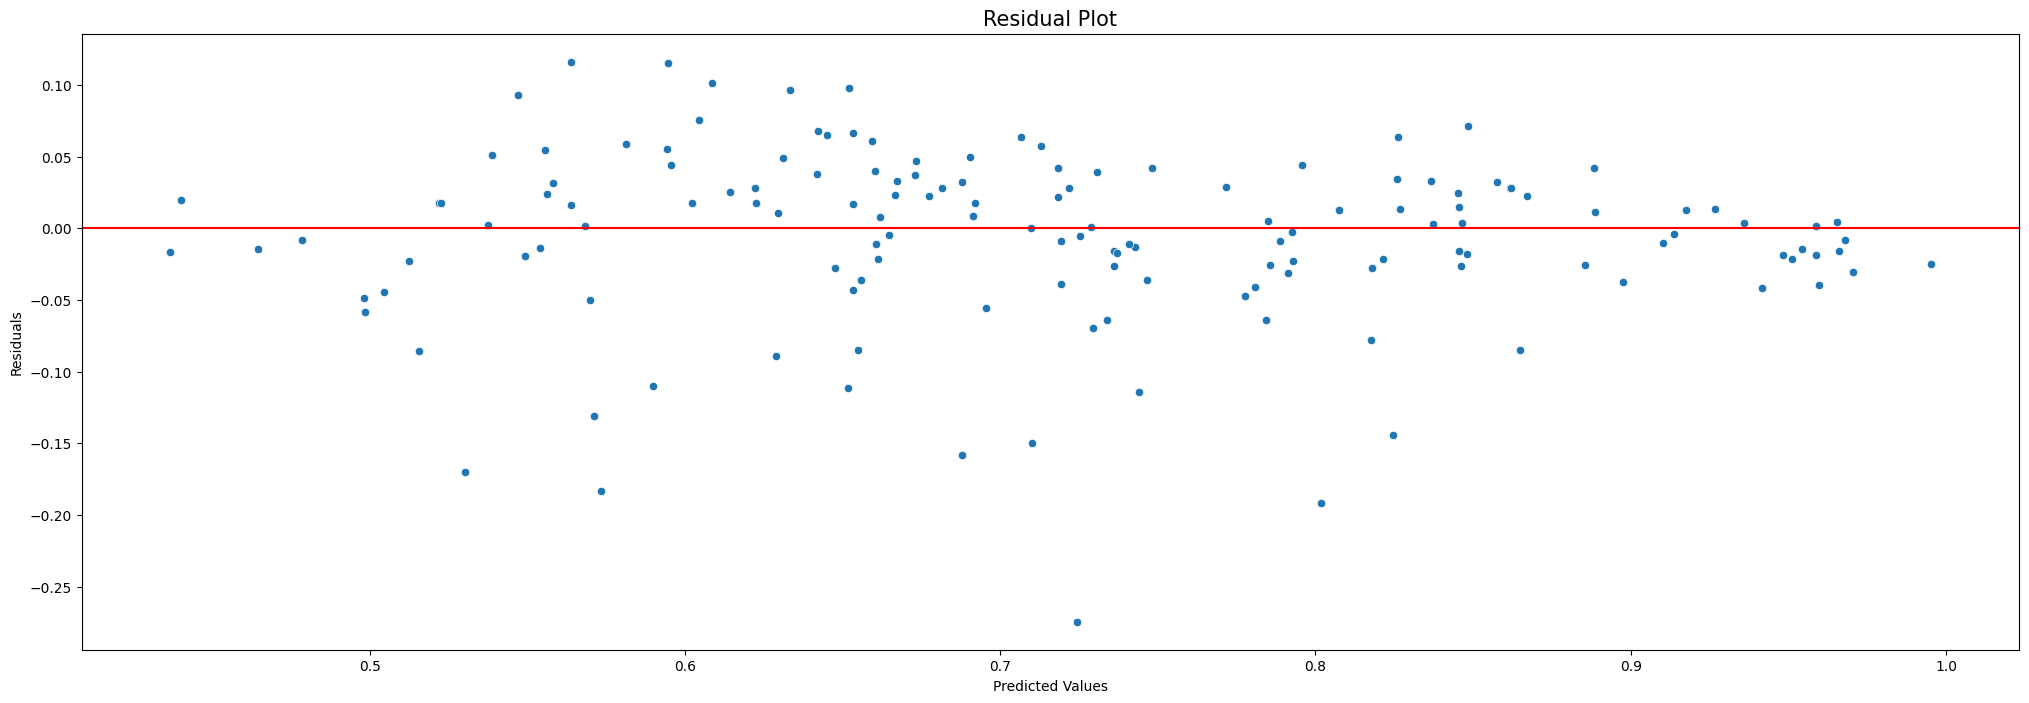

In [41]:
#plot residuals points by scatterplot
plt.figure(figsize=(25,8))
sns.scatterplot(x = y_predicted_test.reshape(-1,), y = residuals.reshape(-1,))

plt.title('Residual Plot', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


**Insights:** Since the residual plot shows no clear pattern or trend in residuals, we can conclude that linearity of variables exists

# **Homoscedasticity**

Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals should be constant across all levels of the independent variables.

In simpler terms, it means that the spread of the residuals should be similar across different values of the predictors.

When homoscedasticity is violated, it indicates that the variability of the errors is not consistent across the range of the predictors, which can lead to unreliable and biased regression estimates.

To test for homoscedasticity, there are several graphical and statistical methods that we can use:


---

1. Residual plot:    

  *   Plot the residuals against the predicted values.
  *   Look for any systematic patterns or trends in the spread of the residuals.
  *   If the spread appears to be consistent across all levels of the predictors, then homoscedasticity is likely met.

2. Scatterplot:

  *    Create scatter plots of the residuals against each independent variable separately.
  *     Again, look for any patterns or trends in the spread of the residuals.


3. Breusch-Pagan Test:

  *    This is a statistical test for homoscedasticity.
  *    It involves regressing the squared residuals on the independent variables and checking the significance of the resulting model.
  *    If the p-value is greater than a chosen significance level (e.g., 0.05), it suggests homoscedasticity.
  *    However, this test assumes that the errors follow a normal distribution.

4. Goldfeld-Quandt Test:

  *    This test is used when you suspect heteroscedasticity due to different variances in different parts of the data.
  *    It involves splitting the data into two subsets based on a specific criterion and then comparing the variances of the residuals in each subset.
  *    If the difference in variances is not significant, it suggests homoscedasticity.

---

**CONCLUSION**

*   It's important to note that the visual inspection of plots is often the first step to identify potential violations of homoscedasticity.

*   Statistical tests can provide additional evidence, but they may have assumptions or limitations that need to be considered.

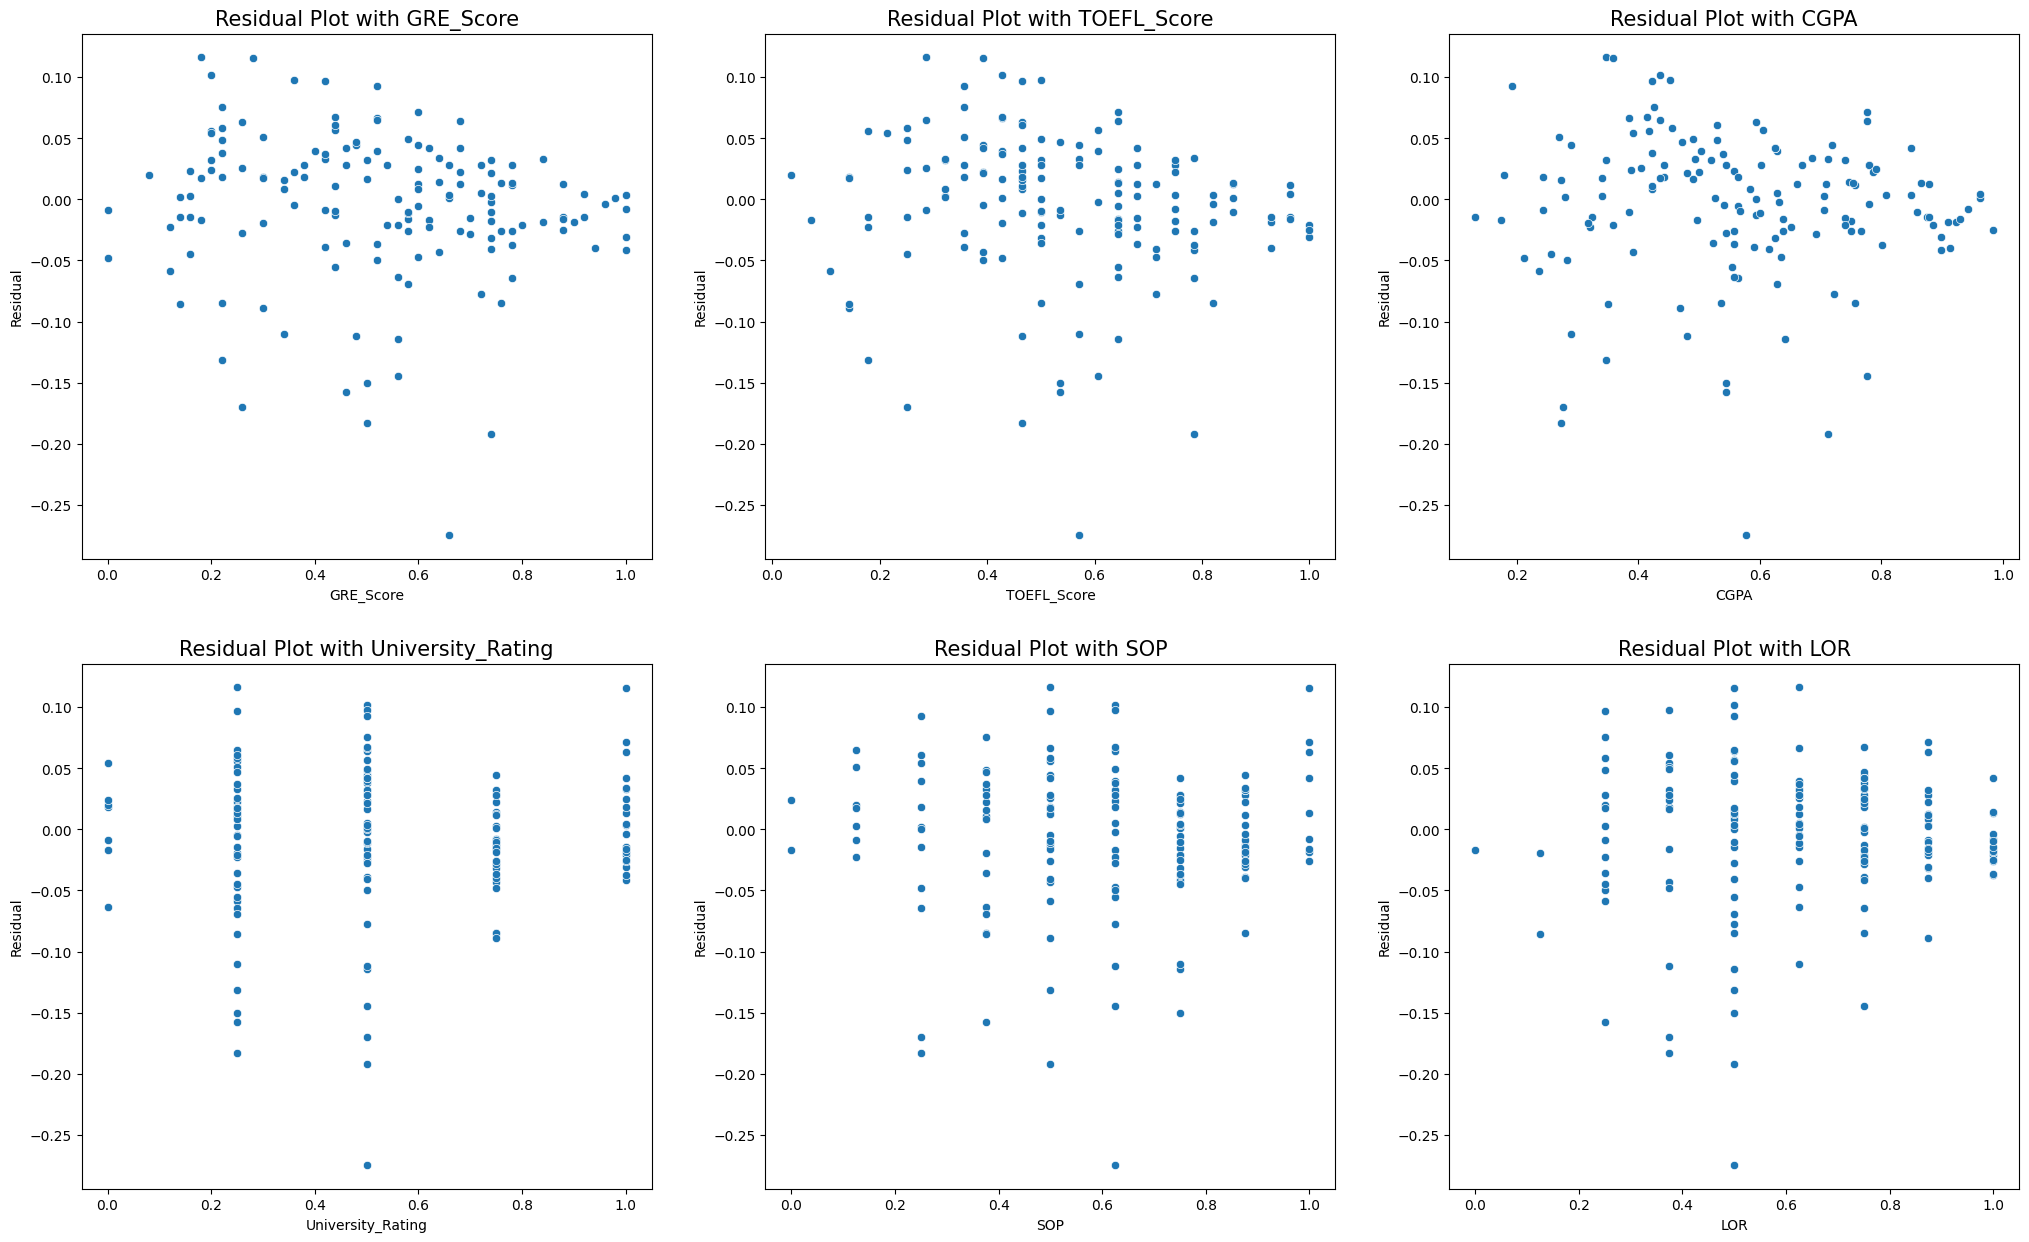

In [42]:
plt.figure(figsize=(25,15))
i=1
for col in x_test.columns[:-1]:
  plt.subplot(2,3,i)
  sns.scatterplot(x=x_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)))
  plt.title(f'Residual Plot with {col}', fontsize=15)
  plt.xlabel(col)
  plt.ylabel('Residual')
  i+=1

plt.show()

**Insights:**Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that homoscedasticity is met.


**Goldfeld-Quandt Test**

* Null Hypothesis(H0) : Homoscedasticity is present.
* Alternative Hypothesis(HA) : Homoscedasticity is absent.

In [43]:
#Goldfeld-Quandt Test for Homoscedasticity
p_value = sm.stats.diagnostic.het_goldfeldquandt(y_train, x_train, drop=0.2)[1]
print(f'Since the p-value of the Goldfeld-Quandt Test is {np.round(p_value,3)}, which is greater than 0.05, therefore, we can conclude that Homoscedasticity is present')

Since the p-value of the Goldfeld-Quandt Test is 0.73, which is greater than 0.05, therefore, we can conclude that Homoscedasticity is present


# **Normality of Residuals**


Normality of residuals refers to the assumption that the residuals in a statistical model are normally distributed.

The assumption of normality is important in many statistical analyses because it allows for the application of certain statistical tests and the validity of confidence intervals and hypothesis tests. When residuals are normally distributed, it implies that the errors are random, unbiased, and have consistent variability.

To check for the normality of residuals, we can follow these steps:

---
1. Residual Histogram:
  *    Create a histogram of the residuals and visually inspect whether the shape of the histogram resembles a bell-shaped curve.
  *   If the majority of the residuals are clustered around the mean with a symmetric distribution, it suggests normality.


2. Q-Q Plot (Quantile-Quantile Plot):
  *   This plot compares the quantiles of the residuals against the quantiles of a theoretical normal distribution.
  *   If the points in the Q-Q plot are reasonably close to the ideal line, it indicates that the residuals are normally distributed.
  *   Deviations from the line may suggest departures from normality.


3. Shapiro-Wilk Test:
  *   This is a statistical test that checks the null hypothesis that the residuals are normally distributed.
  *   It calculates a test statistic and provides a p-value.
  *   If the p-value is greater than the chosen significance level (e.g., 0.05), it suggests that the residuals follow a normal distribution.
  *   However, this test may not be reliable for large sample sizes.


4. Skewness and Kurtosis:
  *   Calculate the skewness and kurtosis of the residuals.
  *   Skewness measures the asymmetry of the distribution, and a value close to zero suggests normality.
  *   Kurtosis measures the heaviness of the tails of the distribution compared to a normal distribution, and a value close to zero suggests similar tail behavior.


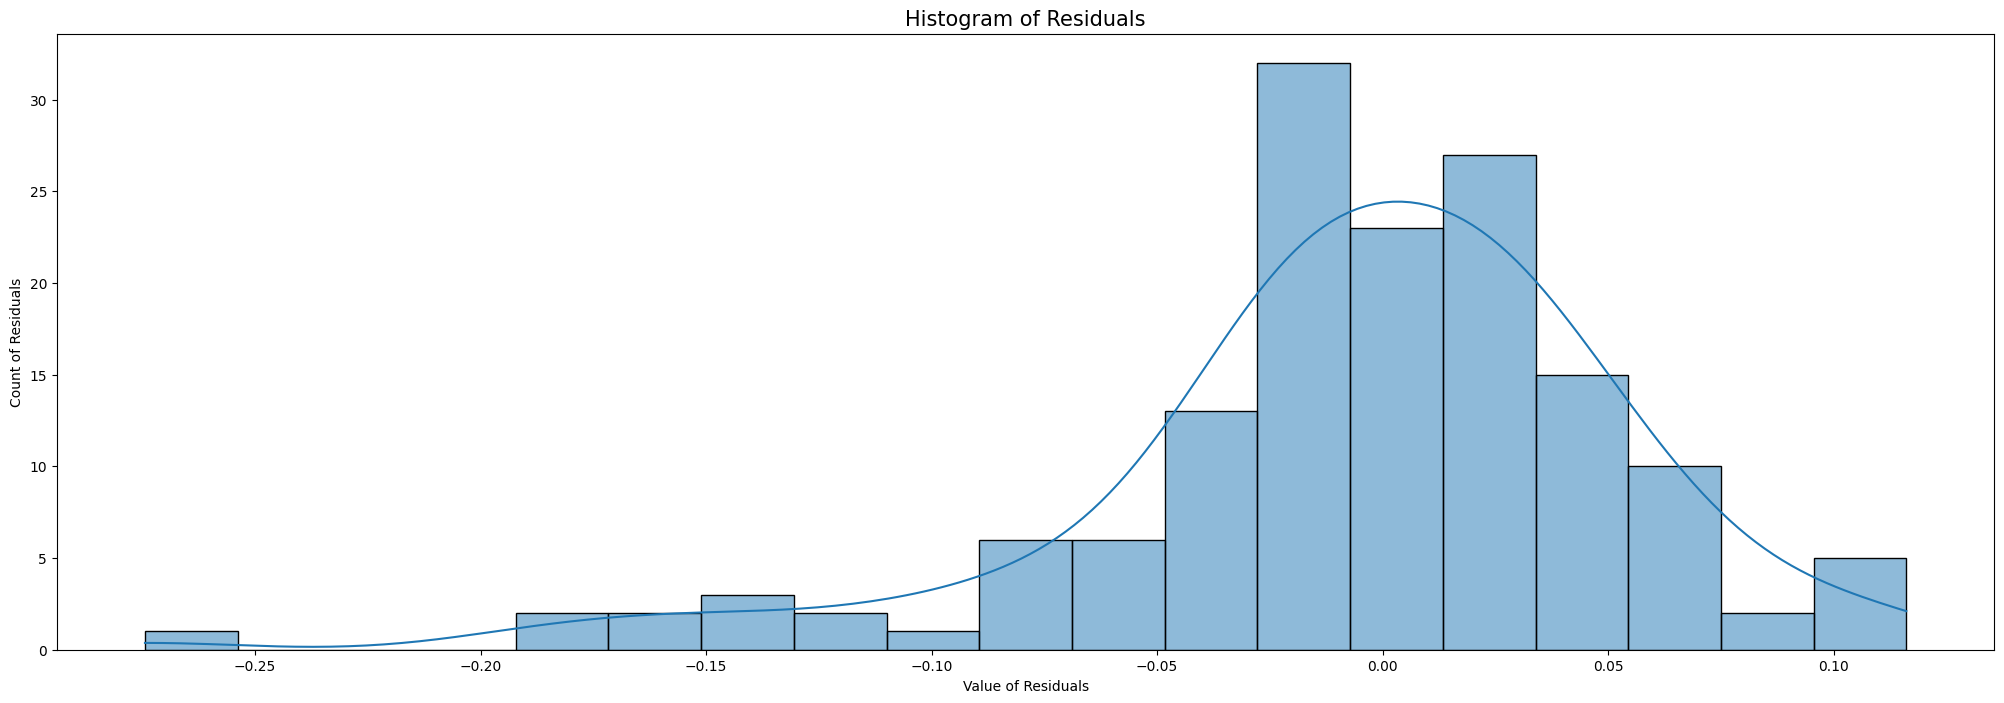

In [49]:
# Residual Histogram plot
plt.figure(figsize=(25,8))
sns.histplot(residuals.reshape((-1,)), kde=True)
plt.title('Histogram of Residuals', fontsize=15)
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show()

**Insights:**The histogram shows that there is a negative skew in the distribution of residuals but it is close to a normal distribution.

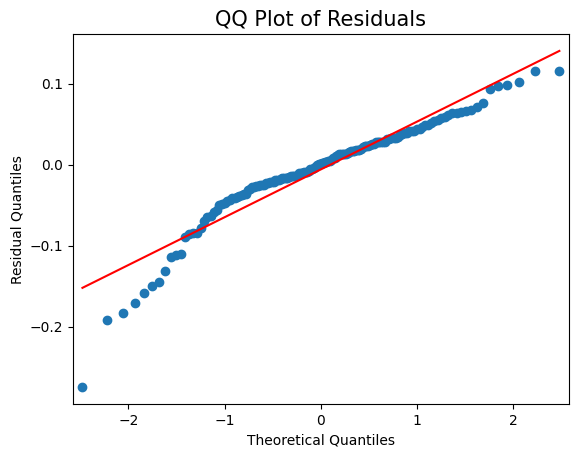

In [45]:
#QQ plot of Residuals
sm.qqplot(residuals.reshape((-1,)), line='r')
plt.title('QQ Plot of Residuals', fontsize=15)
plt.ylabel('Residual Quantiles')
plt.show()

**Insight:**The QQ plot shows that residuals are slightly deviating from the straight diagonal(regression) line.

In [46]:
#Shapiro-Wilk Test
from scipy.stats import shapiro
p_value = np.round(shapiro(residuals)[1],6)
print(f'Since the p-value of the Shapiro-Wilk test is {p_value}, which is much smaller than 0.05, therefore, we can conclude that the residuals are normally distributed')

Since the p-value of the Shapiro-Wilk test is 0.0, which is much smaller than 0.05, therefore, we can conclude that the residuals are normally distributed


# **Lasso and Ridge regression**

**Ridge** and **Lasso** regressions are both regularization techniques used to prevent overfitting in linear regression models. They work by adding a penalty term (a hyperparameter) to the cost function, which helps to control the complexity of the model by shrinking the coefficient values.

---

1.   **Ridge Regression:**

  *   Ridge regression uses L2 regularization, where the penalty term is the squared sum of the coefficients multiplied by a regularization parameter (lambda or alpha).

  *   The regularization term helps to reduce the impact of less important features on the model and prevents them from dominating the model.

  *   Ridge regression can help in reducing the variance of the model and is particularly useful when dealing with multicollinearity (high correlation between independent variables).


2.   **Lasso Regression:**

  *   Lasso regression uses L1 regularization, where the penalty term is the sum of the absolute values of the coefficients multiplied by a regularization parameter (lambda or alpha).

  *   Lasso regression has the ability to shrink some coefficients to exactly zero, effectively performing feature selection.

  *   This makes Lasso regression useful when dealing with high-dimensional data where only a few variables are relevant.

---


The main differences between Ridge and Lasso regression are:

*   Ridge regression tends to shrink all coefficient values towards zero, but it rarely makes them exactly zero.

*   On the other hand, Lasso regression can make coefficient values exactly zero, performing feature selection.

*   Ridge regression is suitable when dealing with multicollinearity, as it will shrink correlated variables together.

*   Lasso regression, however, can select one variable from a set of highly correlated variables and make the others zero.

In [47]:
# Lasso and Ridge regression
ridge = Ridge()
lasso = Lasso()
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)
y_train_ridge = ridge.predict(x_train)
y_test_ridge = ridge.predict(x_test)

y_train_lasso = lasso.predict(x_train)
y_test_lasso = lasso.predict(x_test)
print('-'*35,'\nRidge Regression Training Accuracy')
model_evaluation(y_actual = y_train.values, y_forecast = y_train_ridge, model = ridge)

print('-'*35,'\nRidge Regression Test Accuracy')
model_evaluation(y_actual = y_test.values, y_forecast = y_test_ridge, model = ridge)

print('-'*35,'\nLasso Regression Training Accuracy')
model_evaluation(y_actual = y_train.values, y_forecast = y_train_lasso, model = lasso)

print('-'*35,'\nLasso Regression Test Accuracy')
model_evaluation(y_actual = y_test.values, y_forecast = y_test_lasso, model = lasso)

----------------------------------- 
Ridge Regression Training Accuracy
MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82
----------------------------------- 
Ridge Regression Test Accuracy
MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81
----------------------------------- 
Lasso Regression Training Accuracy
MAE: 0.11
RMSE: 0.14
R2 Score: 0.0
Adjusted R2: -0.02
----------------------------------- 
Lasso Regression Test Accuracy
MAE: 0.11
RMSE: 0.14
R2 Score: -0.0
Adjusted R2: -0.05


**Insights:**While Linear Regression and Ridge regression have similar scores, Lasso regression has not performed well on both training and test data.

# **Identifying Best Model**

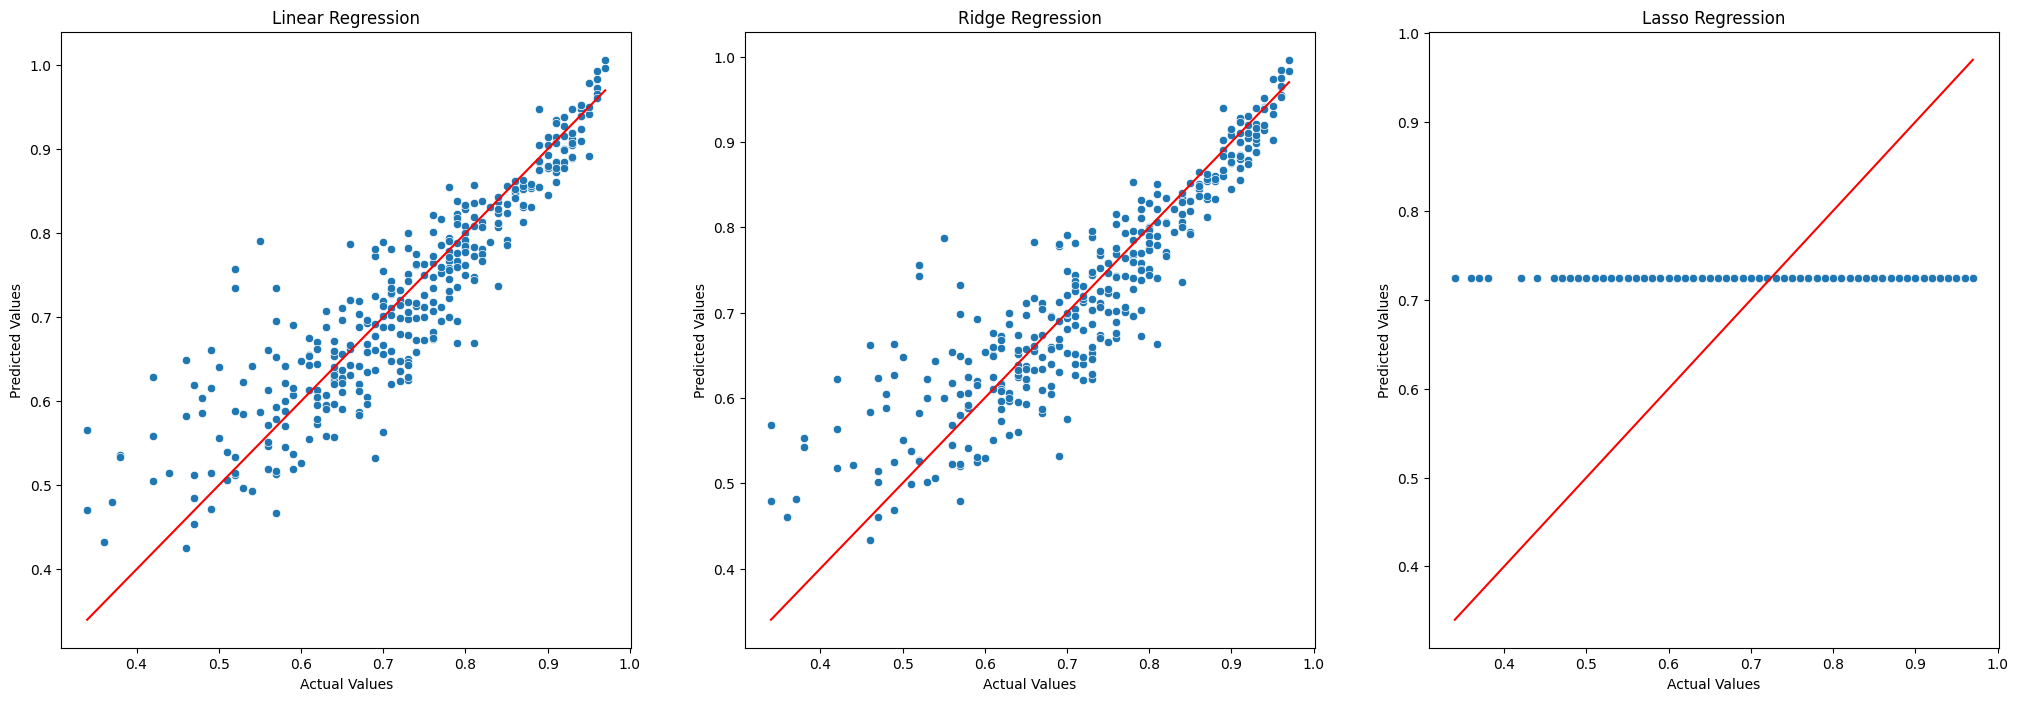

In [48]:
# comparision  between Linear Regression,'Ridge Regression', 'Lasso Regression'
actual_values = y_train.values.reshape((-1,))
predicted_values = [y_predicted_train.reshape((-1,)), y_train_ridge.reshape((-1,)), y_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

plt.figure(figsize=(25,8))
i=1
for preds in predicted_values:
  plt.subplot(1,3,i)
  sns.scatterplot(x=actual_values, y=preds)
  plt.plot([min(actual_values),max(actual_values)], [min(actual_values),max(actual_values)], 'r-')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(model[i-1])
  i+=1

plt.show()

**Insights:**We can observe that both Linear Regression and Ridge Regression have similar accuracy while Lasso regression has oversimplified the model.

This is the reason that the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.



# **Insights & Recommendations**

**Insights:**

* The distribution of the target variable (Chance_of_Admit) is left-skewed.

* GRE_Score, TOEFL_Score and CGPA have a strong positive correlation with Chance_of_Admit. They also have high correlation amongst themselves.

* The categorical variables such as University_Ranking, Research, SOP and LOR also show an upward trend for Chance_of_Admit.

* From the model coefficients (weights), we can conclude that CGPA is the most significant predictor variable while SOP and University_Rating are the least significant.

* Both Linear Regression and Ridge Regression models, which are our best models, have captured upto 82% of the variance in the target variable (Chance_of_Admit). Due to high colinearity among the predictor variables, it is difficult to achieve better results.

* Other than multicolinearity, the predictor variables have met the conditions required for Linear Regression - mean of residuals is close to 0, linearity of variables, normality of residuals and homoscedasticity is established.

**Recommendations:**

* Since GRE_Score, TOEFL_Score and CGPA are highly correlated, it is recommended to add more independent features for better prediction.

* Examples of other independent variables could be Essay, Work Experience, Internships, Mock Interview Performance and diversity variables.


